In [ ]:
pip install textract

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import re
import zipfile
import os
import pandas as pd
import textract
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import word_tokenize

In [ ]:
zip_filepath="Resumes.zip"

In [ ]:
with zipfile.ZipFile(zip_filepath,'r') as zip_read:
    zip_read.extractall(r"Resumes")
    zip_extract=zip_read.namelist()

In [ ]:
zip_extract

['Resumes/Internship_Ravali_Musquare Technologies (1).docx',
 'Resumes/Internship_Susovan Bag_Musquare Technologies.docx',
 'Resumes/Peoplesoft resumes/',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_AnubhavSingh.docx',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_G Ananda Rayudu.doc',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_Gangareddy.doc',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_Murali.docx',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_Priyanka Ramadoss.doc',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_SirazuddinMohammad.docx',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_srinivasarao.doc',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_Varkala Vikas.docx',
 'Resumes/Peoplesoft resumes/Peoplesoft Admin_Vinod Akkala.doc',
 'Resumes/Peoplesoft resumes/PeopleSoft DBA_Ganesh Alladi.doc',
 'Resumes/Peoplesoft resumes/PeopleSoft DBA_Vivekanand Sayana.docx',
 'Resumes/Peoplesoft resumes/Peoplesoft Finance_Arun Venu.doc',
 'Resumes/Peoplesoft resumes/Peoplesoft Finance_Prit

In [ ]:
len(zip_extract)

82

In [ ]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import docx

def read_docx(file_path):
    try:
        doc = docx.Document(file_path)
        content = ""

        for paragraph in doc.paragraphs:
            content += paragraph.text + "\n"

        return content
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [ ]:
def read_resume(directory):
    file_path = []
    category = []
    file_content = []
    file_name = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            print(file)
            file_path.append(os.path.join(root, file))
            folder_name = os.path.basename(root)

            if folder_name=="Resumes":
               folder_name="React_JS"

            elif re.search(r'\bresumes\b',folder_name,flags=re.IGNORECASE):
               folder_name = folder_name.replace("resumes", "").strip()

            category.append(folder_name)
            file_name.append(file)


            content = read_docx(os.path.join(root, file))
            file_content.append(content)


    # Create a DataFrame
    df = pd.DataFrame({
        'File': file_name,
        'Content': file_content,
        'JobPost': category
    })

    return df

Data=read_resume(r"Resumes")
print("---------------")
print(Data)

Internship_Ravali_Musquare Technologies (1).docx
Internship_Susovan Bag_Musquare Technologies.docx
React Developer_Deepakreddy.docx
React Developer_Haripriya.docx
React Developer_Kamalakar Reddy.docx
React Developer_Naveen sadhu.docx
React Developer_PavasGoswami.doc
An error occurred: file 'Resumes\Resumes\React Developer_PavasGoswami.doc' is not a Word file, content type is 'application/vnd.openxmlformats-officedocument.themeManager+xml'
React Developer_Pragnya.docx
React Developer_Sarala Madasu-converted.docx
React Developer_Thirupathiamma.docx
React Developer_Vinay Reddy.doc
An error occurred: file 'Resumes\Resumes\React Developer_Vinay Reddy.doc' is not a Word file, content type is 'application/vnd.openxmlformats-officedocument.themeManager+xml'
React Dev_Krishna Kanth.docx
React Dev_Krishna Kanth_Musquare Technologies.docx
React JS Developer_AnjaniPriyadarshini.doc
An error occurred: file 'Resumes\Resumes\React JS Developer_AnjaniPriyadarshini.doc' is not a Word file, content type

In [ ]:
Data

,File,Content,JobPost
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS
...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday
77,Venkateswarlu B_Hexaware.doc,None,workday


In [ ]:
!pip3 install matplotlib

In [ ]:
import matplotlib.pyplot as plt

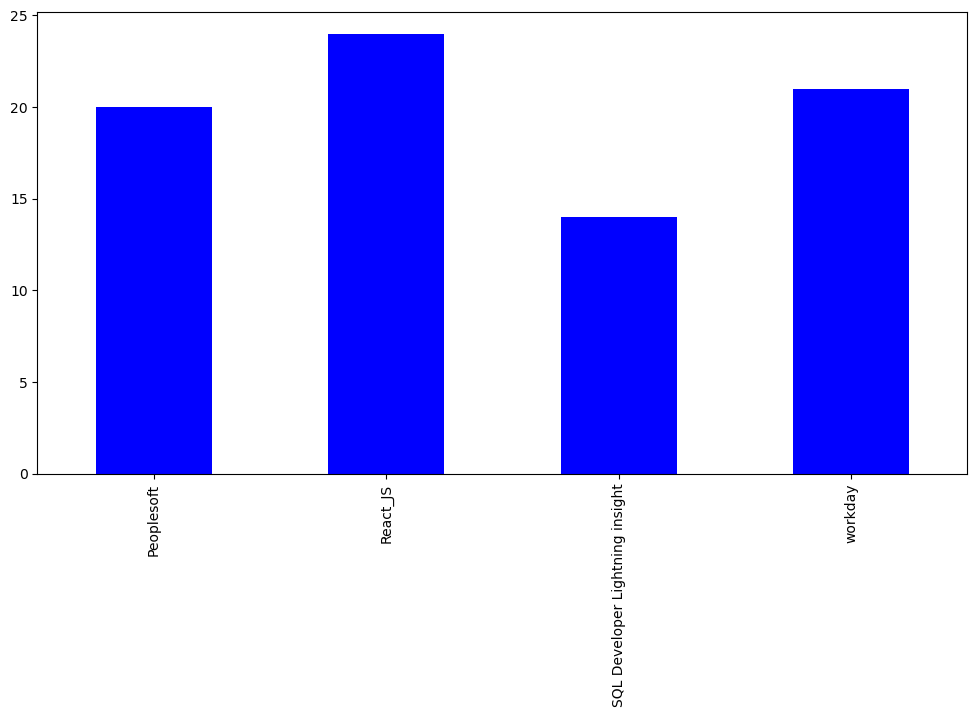

In [ ]:
Data['JobPost'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6),color='b')
plt.show()

In [ ]:
Data.duplicated().sum()

0

In [ ]:
CopyData=Data.copy()

# EDA

In [ ]:
from nltk import word_tokenize

In [ ]:
def Cleaned(text):
    tokens = word_tokenize(text)
    details = [Text.strip() for Text in tokens]
    details = [Text for Text in details if Text]
    details = ' '.join(details)
    return details

In [ ]:
for index, row in CopyData.iterrows():
    content = row['Content']

    # Check if 'Content' is a string; if not, handle it appropriately
    if isinstance(content, str):
        processed_text = Cleaned(content)
    else:
        # Handle non-string data (e.g., convert to string or handle differently)
        processed_text = str(content)

    CopyData.at[index, 'ProcessedText'] = processed_text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : //www....
...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S.S Role : Wo...
77,Venkateswarlu B_Hexaware.doc,None,workday,None


In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
def tknzr(details):
  tknzr = TweetTokenizer(strip_handles=True)
  tokens = tknzr.tokenize(details)
  Text = ' '.join(tokens)
  return Text

In [ ]:
for index, row in CopyData.iterrows():
    content = row['ProcessedText']
    processed_text = tknzr(content)
    CopyData.at[index, 'ProcessedText'] = processed_text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...
...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...
77,Venkateswarlu B_Hexaware.doc,None,workday,None


# Extarct Url from Dtails and add to DataFrame

In [ ]:
def extract_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    urls = re.findall(url_pattern, text)
    return urls

In [ ]:
for index, row in CopyData.iterrows():
    content = row['Content']

    try:
        # Check if content is a string or bytes-like object
        if isinstance(content, (str, bytes)):
            processed_text = extract_urls(content)  # Extract URLs from the text

            # Filter out non-string elements and convert them to strings
            processed_text = [str(item) for item in processed_text if isinstance(item, (str, bytes))]

            processed_text_str = ', '.join(processed_text)  # Join the strings
            CopyData.at[index, 'Url'] = processed_text_str
        else:
            # Handle non-string/bytes data appropriately
            CopyData.at[index, 'Url'] = ''  # Set 'Url' to an empty string or handle differently

    except Exception as e:
        # Print the error message and details for debugging
        print(f"Error processing row {index}: {e}")
        CopyData.at[index, 'Url'] = ''  # Set 'Url' to an empty string or handle the error as needed


In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...,https://www.linkedin.com/in/kamalakar-reddy-77...
...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,


# Find phone numbers and remove it

In [ ]:
def findphone(text):
  phone_pattern = r'(\+\d{1,3}\s?\d{10})|(\b\d{10}\b)'
  phone_numbers = re.findall(phone_pattern, text)
  phone_numbers = [match[0] or match[1] for match in re.findall(phone_pattern, text)]
  text_without_phone=re.sub(phone_pattern, '', text)
  return phone_numbers,text_without_phone

In [ ]:
for index, row in CopyData.iterrows():
    data = row['ProcessedText']
    phone_numbers, text_without_phone = findphone(data)
    CopyData.at[index, 'phone'] = ', '.join(phone_numbers) if phone_numbers else ''
    CopyData.at[index, 'ProcessedText'] = text_without_phone

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


In [ ]:
import string

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
import numpy as np

In [ ]:
CopyData['ProcessedText'] = np.vectorize(remove_pattern)(CopyData['ProcessedText'], "@[\w]*")
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...,https://www.linkedin.com/in/kamalakar-reddy-77...,
5,React Developer_Naveen sadhu.docx,\nNaveen Sadhu\n\n\nTitle: software developer\...,React_JS,Naveen Sadhu Title : software developer Locati...,,
6,React Developer_PavasGoswami.doc,None,React_JS,None,,
7,React Developer_Pragnya.docx,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React_JS,PRAGNYA PATTNAIK Expertise : Having around 2 y...,,
8,React Developer_Sarala Madasu-converted.docx,"\n\n 204,Sri geethika prestige,road number 10...",React_JS," 204 , Sri geethika prestige , road number 10...",,
9,React Developer_Thirupathiamma.docx,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,


# Remove URL and word containing https

In [ ]:
CopyData['ProcessedText'] = CopyData['ProcessedText'].astype(str)
CopyData['ProcessedText'] = CopyData['ProcessedText'].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))

In [ ]:
clean=[]

In [ ]:
for index, row in CopyData.iterrows():
    no_links = [word for word in row.ProcessedText.split() if 'http' not in word]
    clean.append(' '.join(no_links))

In [ ]:
CopyData['ProcessedText'] = clean

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


# Removing Empty Resumes

In [ ]:
CopyData=CopyData[CopyData['ProcessedText']!='']

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


# Removing Duplicated Resumes

In [ ]:
CopyData.drop_duplicates(subset=['ProcessedText'], keep=False)
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


# Text Strip (Cleaning data to pure form)

In [ ]:
def cleandata(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    remove words containing numbers, handle contractions, and correct misspellings.'''

    # Make text lowercase
    text = text.lower()
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove special characters
    text = re.sub('⇨|:|•|!', '', text)
    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove newlines
    text = re.sub('\n', '', text)
    # Remove tab
    text = text.replace('\t', ' ')
    # Remove extra white space
    text=re.sub('\s+', ' ', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    #Remove numeric and alpha numeric texts
    text = re.sub( r'[^A-Za-z]', ' ', text)
    return text

In [ ]:
for index, row in CopyData.iterrows():
    data=row['ProcessedText']
    text=cleandata(data)
    CopyData.at[index, 'CleanedText'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none


# Remove Emojis and Images

In [ ]:
def remove_pictures_and_emojis(text):
    # Regular expression pattern to match pictures and emojis
    picture_emoji_pattern = r'[^\w\s,.!?]'
    text_without_pictures_emojis = re.sub(picture_emoji_pattern, '', text)  # Replaces pictures and emojis with an empty string
    return text_without_pictures_emojis

In [ ]:
for index, row in CopyData.iterrows():
    data=row['CleanedText']
    text=remove_pictures_and_emojis(data)
    CopyData.at[index, 'CleanedText'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none


# Remove boilerplate text

In [ ]:
def remove_boilerplate(text):
    # Define patterns for common boilerplate sections
    boilerplate_patterns = [
        r'contact information:.*',
        r'adress:.*',
        r'mobile:*',
        r'hobbies:.*',
        r'email".*',
        r'Github:.*',
        r'Kaggle:.*'
    ]

    # Remove boilerplate sections from the text
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Remove extra whitespace and newlines
    text = re.sub('\s+', ' ', text).strip()

    return text

In [ ]:
for index, row in CopyData.iterrows():
    data = row['CleanedText']
    corrected_text = remove_boilerplate(data)
    CopyData.at[index, 'CleanedText'] = corrected_text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none


# Removing StopWords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
cleaned=[]

In [ ]:
cleaned = []
for index, row in CopyData.iterrows():
    no_stopwords = [word for word in row.CleanedText.split() if word not in stopwords]
    cleaned.append(' '.join(no_stopwords))

CopyData['Clean'] = cleaned

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...
...,...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...,seeking suitable positions workday hcm techno ...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none,none


# Tokenize

In [ ]:
CopyData['Token'] =CopyData['Clean'].apply(lambda x: nltk.word_tokenize(x))
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,..."
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s..."
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer..."
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa..."
5,React Developer_Naveen sadhu.docx,\nNaveen Sadhu\n\n\nTitle: software developer\...,React_JS,Naveen Sadhu Title : software developer Locati...,,,naveen sadhu title software developer location...,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
6,React Developer_PavasGoswami.doc,None,React_JS,None,,,none,none,[none]
7,React Developer_Pragnya.docx,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React_JS,PRAGNYA PATTNAIK Expertise : Having around 2 y...,,,pragnya pattnaik expertise having around years...,pragnya pattnaik expertise around years experi...,"[pragnya, pattnaik, expertise, around, years, ..."
8,React Developer_Sarala Madasu-converted.docx,"\n\n 204,Sri geethika prestige,road number 10...",React_JS," 204 , Sri geethika prestige , road number 10...",,,sri geethika prestige road number bandari layo...,sri geethika prestige road number bandari layo...,"[sri, geethika, prestige, road, number, bandar..."
9,React Developer_Thirupathiamma.docx,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,,thirupathamma balla summary year of it experie...,thirupathamma balla summary year experience re...,"[thirupathamma, balla, summary, year, experien..."


# Lemmitisation

In [ ]:
pip install spacy

In [ ]:
import spacy

In [ ]:
from spacy.cli import download

download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas

In [ ]:
for index,row in CopyData.iterrows():
  text=row['Clean']
  lemtext=lemmatize_text(text)
  text=' '.join(lemtext)
  CopyData.at[index,'Lemtext']=text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ...",name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,...",susovan bag seek challenge position field scie...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s...",kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer...",haripriya battina experience ui developer reac...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa...",kamalakar reddy link professional summary year...
...,...,...,...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none,none,[none],none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...,seeking suitable positions workday hcm techno ...,"[seeking, suitable, positions, workday, hcm, t...",seek suitable position workday hcm techno func...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...,"[workday, hcm, fcm, name, kumar, role, workday...",workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none,none,[none],none


In [ ]:
for index, row in CopyData.iterrows():
    lemtext = row['Lemtext']
    doc = nlp(lemtext)
    text = doc.text  # Get the processed text as a string
    CopyData.at[index, 'FinalData'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext,FinalData
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ...",name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,...",susovan bag seek challenge position field scie...,susovan bag seek challenge position field scie...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s...",kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer...",haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa...",kamalakar reddy link professional summary year...,kamalakar reddy link professional summary year...
...,...,...,...,...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none,none,[none],none,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...,seeking suitable positions workday hcm techno ...,"[seeking, suitable, positions, workday, hcm, t...",seek suitable position workday hcm techno func...,seek suitable position workday hcm techno func...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...,"[workday, hcm, fcm, name, kumar, role, workday...",workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none,none,[none],none,none


# Ngrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Finaltext=np.array(CopyData['FinalData'])

In [ ]:
cv=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv.fit_transform(Finaltext)

In [ ]:
bow_matrix_ngram

<79x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 17082 stored elements in Compressed Sparse Row format>

In [ ]:
cv.get_feature_names_out()

array(['ability', 'ability work', 'ability work team', ...,
       'year professional', 'year professional experience',
       'year workday'], dtype=object)

In [ ]:
sum_words = bow_matrix_ngram.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_frequency)
df.columns = ['Words', 'Count']

df[0:10]

,Words,Count
0,experience,327
1,use,319
2,report,262
3,work,248
4,server,237
5,application,236
6,create,202
7,project,198
8,workday,191
9,integration,171


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

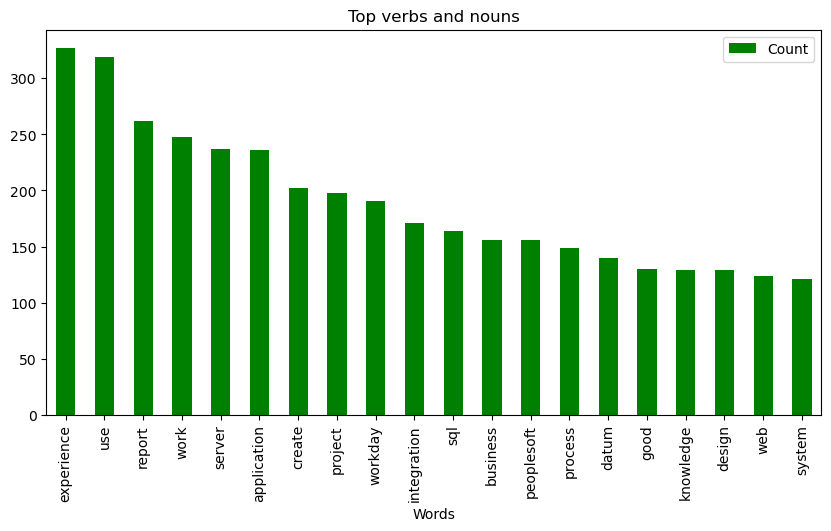

In [ ]:
df[0:20].plot.bar(x='Words', figsize=(10,5), title='Top verbs and nouns',color='green')

In [ ]:
feature_names = cv.get_feature_names_out()
print(feature_names[100:200])

['application' 'application apply' 'application apply patch'
 'application create' 'application create multiple' 'application design'
 'application design many' 'application designer'
 'application designer application' 'application designer datum'
 'application development' 'application engine'
 'application engine component' 'application engine load'
 'application engine people' 'application engine program'
 'application hrm' 'application interface' 'application management'
 'application management task' 'application package'
 'application package peoplesoft' 'application report'
 'application server' 'application server domain'
 'application server process' 'application server web'
 'application update' 'application upgrade' 'application use'
 'application use html' 'application work' 'apply' 'apply application'
 'apply application apply' 'apply environment'
 'apply environment maintain' 'apply fix' 'apply fix patch' 'apply patch'
 'apply patch bundle' 'apply patch fix' 'apply patch

In [ ]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
Countvector=pd.DataFrame(bow_matrix_ngram.toarray(),columns=cv.get_feature_names_out())

In [ ]:
Countvector

,ability,ability work,ability work team,absence,absence condition,absence condition rule,absence management,academic,academic percentage,acceptable,...,year experience peoplesoft,year experience react,year experience software,year experience workday,year extensive,year extensive experience,year month,year professional,year professional experience,year workday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,1,0,0,7,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data=new_df = CopyData[['JobPost', 'FinalData']]

In [ ]:
Data

,JobPost,FinalData
0,React_JS,name ravali p curriculum vitae specialization ...
1,React_JS,susovan bag seek challenge position field scie...
2,React_JS,kanumuru deepak reddy career objective secure ...
3,React_JS,haripriya battina experience ui developer reac...
4,React_JS,kamalakar reddy link professional summary year...
...,...,...
74,workday,none
75,workday,seek suitable position workday hcm techno func...
76,workday,workday hcm fcm name kumar role workday consul...
77,workday,none


# WordCloud

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [ ]:
value_counts = CopyData['JobPost'].value_counts()

In [ ]:
value_counts

React_JS                           24
workday                            21
Peoplesoft                         20
SQL Developer Lightning insight    14
Name: JobPost, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
file_path   = r'Resumes'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    print(file_path)
    print(folder)
    folder_path = file_path+"\\" + folder
    print(folder_path)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

Resumes
Resumes
Resumes\Resumes


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [ ]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

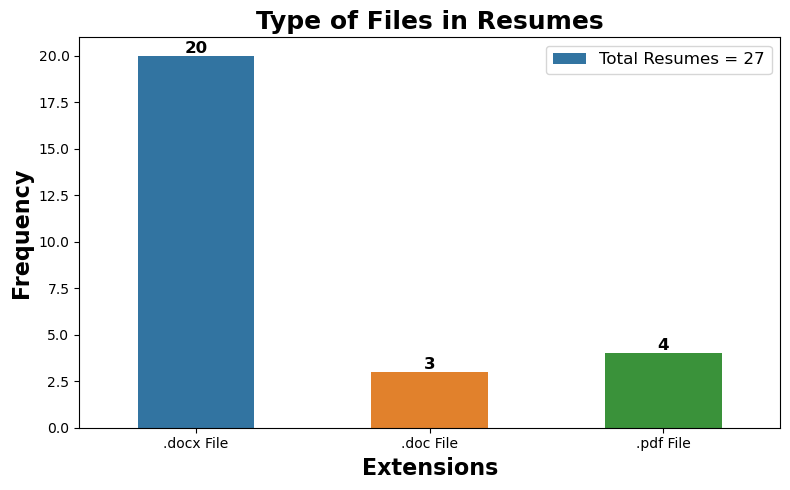

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(8,5), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

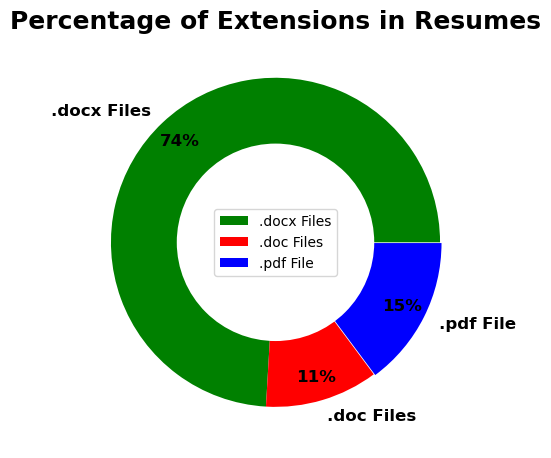

In [ ]:
fig = plt.figure(figsize=(5,5), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['g', 'r', 'b']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

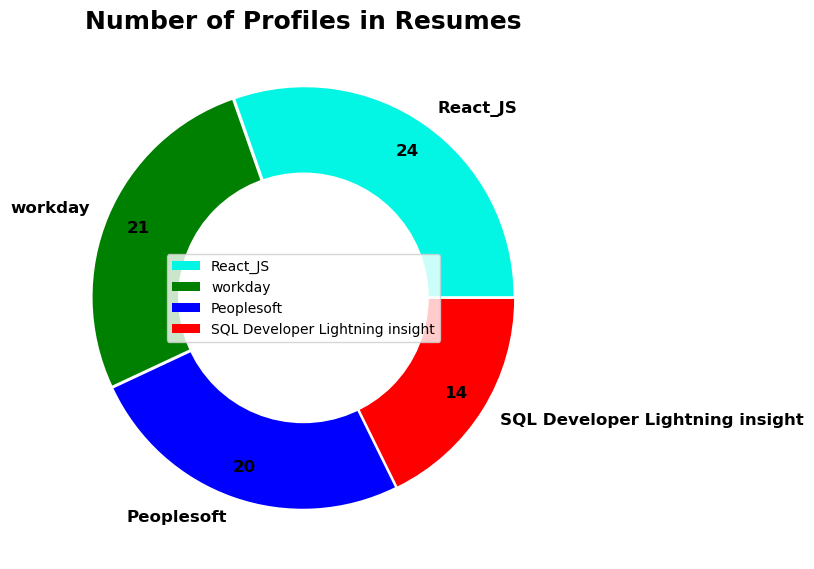

In [ ]:
fig = plt.figure(figsize=(8,8))

sizes = CopyData.JobPost.value_counts()
labels = CopyData.JobPost.value_counts().index
colors = ['#03F6E4', 'g', 'b', 'r'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

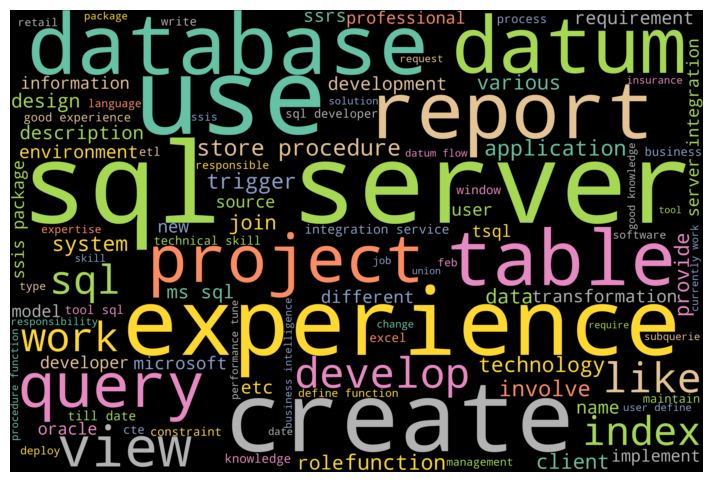

In [ ]:
SQL = Data[Data['JobPost'] == 'SQL Developer Lightning insight']  # Filter rows where JobPost is 'React_JS'
words = np.array(SQL['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

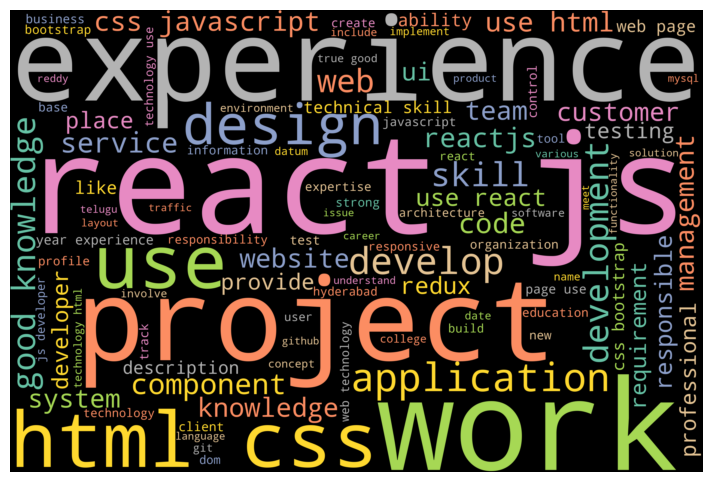

In [ ]:
react_js_data = Data[Data['JobPost'] == 'React_JS']  # Filter rows where JobPost is 'React_JS'
words = np.array(react_js_data['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

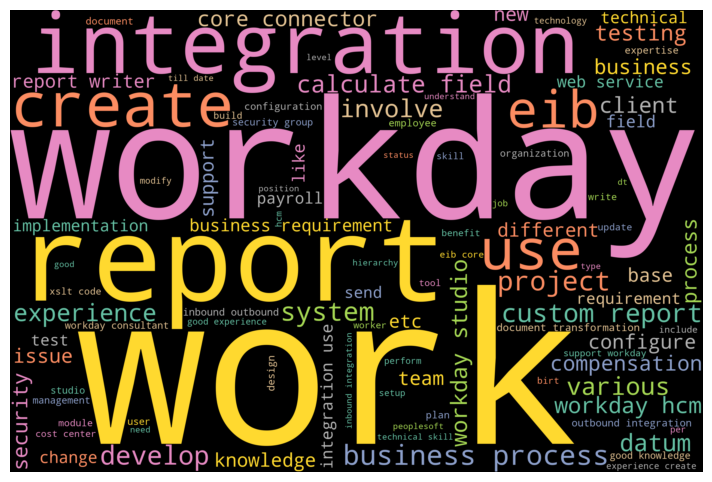

In [ ]:
workday = Data[Data['JobPost'] == 'workday']  # Filter rows where JobPost is 'React_JS'
words = np.array(workday['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

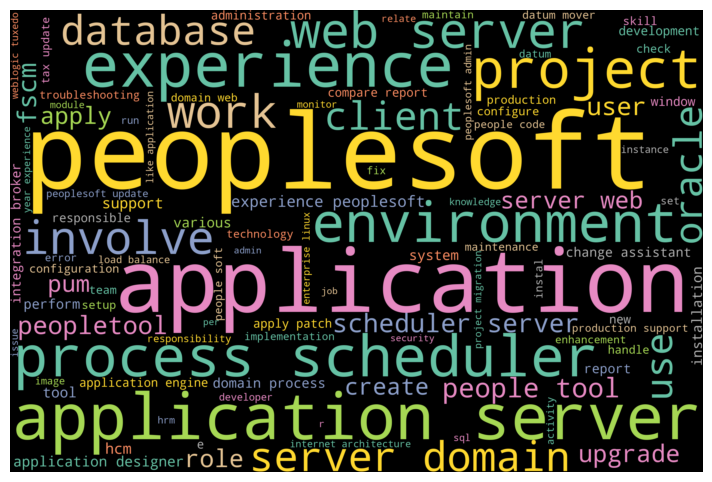

In [ ]:
Peoplesoft = Data[Data['JobPost'] == 'Peoplesoft']  # Filter rows where JobPost is 'React_JS'
words = np.array(Peoplesoft['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
b=np.array(Data["FinalData"])

In [ ]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'name': 1530,
 'ravali': 1925,
 'curriculum': 555,
 'vitae': 2584,
 'specialization': 2222,
 'computer': 440,
 'science': 2089,
 'engg': 787,
 'utilize': 2534,
 'technical': 2376,
 'skill': 2188,
 'achieve': 22,
 'target': 2362,
 'develop': 650,
 'good': 993,
 'performance': 1717,
 'organization': 1637,
 'manual': 1393,
 'testing': 2401,
 'strong': 2293,
 'knowledge': 1286,
 'sdlc': 2104,
 'concept': 442,
 'extensive': 857,
 'white': 2628,
 'box': 287,
 'test': 2399,
 'functional': 950,
 'integration': 1183,
 'extreme': 862,
 'system': 2348,
 'adhoc': 40,
 'reliability': 1982,
 'exploratory': 851,
 'stlc': 2278,
 'case': 346,
 'scenario': 2080,
 'globalization': 982,
 'compatibility': 426,
 'regression': 1974,
 'plan': 1754,
 'agile': 65,
 'methdology': 1448,
 'scrum': 2103,
 'methodology': 1451,
 'expertise': 850,
 'sprint': 2233,
 'planning': 1755,
 'meet': 1438,
 'retrospective': 2034,
 'product': 1838,
 'backlog': 212,
 'meeting': 1439,
 'bug': 306,
 'triage': 2467,
 'normalizatio

In [ ]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,abdul,ability,able,abovementione,absence,abstract,abstraction,academic,accept,acceptable,...,xpath,xslt,xtt,year,yield,yii,yogi,yonder,zero,zp
0,0.0,0.000000,0.0,0.055573,0.000000,0.0,0.060834,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.068646,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.038666,0.000000,0.0,...,0.0,0.000000,0.000000,0.036685,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.069184,0.000000,0.0,0.000000,0.051440,0.000000,0.0,...,0.0,0.000000,0.000000,0.024402,0.0,0.0,0.0,0.151467,0.0,0.0
4,0.0,0.035969,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.022773,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
75,0.0,0.016521,0.0,0.000000,0.166522,0.0,0.000000,0.000000,0.032462,0.0,...,0.0,0.063959,0.027663,0.031379,0.0,0.0,0.0,0.000000,0.0,0.0
76,0.0,0.000000,0.0,0.000000,0.020974,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.075187,0.024390,0.009222,0.0,0.0,0.0,0.000000,0.0,0.0
77,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
import pickle

In [ ]:
file_path = "vectorizzzer.pkl"

In [ ]:
with open(file_path, "wb") as f:
    pickle.dump(tv, f)

In [ ]:
Data

,JobPost,FinalData
0,React_JS,name ravali p curriculum vitae specialization ...
1,React_JS,susovan bag seek challenge position field scie...
2,React_JS,kanumuru deepak reddy career objective secure ...
3,React_JS,haripriya battina experience ui developer reac...
4,React_JS,kamalakar reddy link professional summary year...
...,...,...
74,workday,none
75,workday,seek suitable position workday hcm techno func...
76,workday,workday hcm fcm name kumar role workday consul...
77,workday,none


In [ ]:
Data['JobPost'].unique()

array(['React_JS', 'Peoplesoft', 'SQL Developer Lightning insight',
       'workday'], dtype=object)

# Logistic Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label= LabelEncoder()
Data['JobPost']=label.fit_transform(Data['JobPost'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19016\2147056961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['JobPost']=label.fit_transform(Data['JobPost'])


In [ ]:
Data['JobPost'].unique()

array([1, 0, 2, 3])

In [ ]:
Data

,JobPost,FinalData
0,1,name ravali p curriculum vitae specialization ...
1,1,susovan bag seek challenge position field scie...
2,1,kanumuru deepak reddy career objective secure ...
3,1,haripriya battina experience ui developer reac...
4,1,kamalakar reddy link professional summary year...
...,...,...
74,3,none
75,3,seek suitable position workday hcm techno func...
76,3,workday hcm fcm name kumar role workday consul...
77,3,none


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
XTrain_Data,XTest_Data,YTrain_Data,YTest_Data=train_test_split(Data['FinalData'],Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

In [ ]:
XTrain,XTest,YTrain,YTest=train_test_split(TFIDF,Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

In [ ]:
print('Train & Test Split is:')
XTrain.shape, XTest.shape

Train & Test Split is:


((63, 2681), (16, 2681))

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LRmodelpipeline=Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression(random_state=42))])

In [ ]:
LRmodelpipeline.fit(XTrain_Data,YTrain_Data)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(random_state=42))])

In [ ]:
YTrue=LRmodelpipeline.predict(XTest_Data)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
LR_Report=classification_report(YTrue,YTest_Data)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
cmlr=confusion_matrix(YTrue,YTest)

In [ ]:
report=LR_Report

In [ ]:
lines = LR_Report.strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
lr_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", lr_f1_score)

Total F1-score: 0.88


              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.40      1.00      0.57         2
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         0

    accuracy                           0.56        16
   macro avg       0.60      0.54      0.50        16
weighted avg       0.93      0.56      0.64        16

[[4 2 0 4]
 [0 2 0 0]
 [0 1 3 0]
 [0 0 0 0]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(45.722222222222214, 0.5, 'Actual')

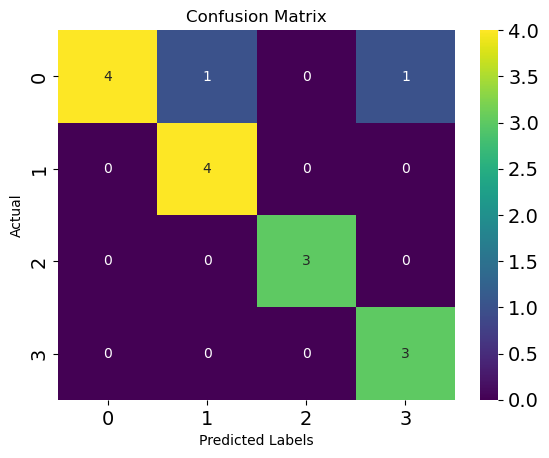

In [ ]:
YTruedt=best_model_dt.predict(XTest)
plt.title("Classification Report for Logistic Regression")
DT_Report=classification_report(YTruedt,YTest)
print(DT_Report)
print("=====================================================================")
cmdt=confusion_matrix(YTruedt,YTest)
print(cmdt)
sns.heatmap(cmlr,annot=True,cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
best_model_dt=DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=4, min_samples_split=5)

In [ ]:
best_model_dt

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)

In [ ]:
best_model_dt.fit(XTrain,YTrain)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.40      1.00      0.57         2
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         0

    accuracy                           0.56        16
   macro avg       0.60      0.54      0.50        16
weighted avg       0.93      0.56      0.64        16

[[4 2 0 4]
 [0 2 0 0]
 [0 1 3 0]
 [0 0 0 0]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(45.722222222222214, 0.5, 'Actual')

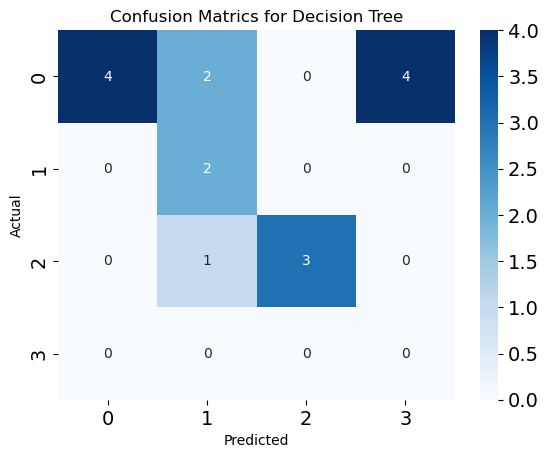

In [ ]:
YTruedt=best_model_dt.predict(XTest)
plt.title("Classification Report for Decision Tree")
DT_Report=classification_report(YTruedt,YTest)
print(DT_Report)
print("=====================================================================")
cmdt=confusion_matrix(YTruedt,YTest)
print(cmdt)
sns.heatmap(cmdt,annot=True,cmap='Blues')
plt.title("Confusion Matrics for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
lines = DT_Report.strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
dt_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", dt_f1_score)

Total F1-score: 0.56


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
best_model_rf=RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50)

In [ ]:
best_model_rf.fit(XTrain,YTrain)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=50)

Classification report for Random forest
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.89      0.92      0.89        16
weighted avg       0.90      0.88      0.87        16

============= ======= =======================
[[4 1 0 1]
 [0 4 0 0]
 [0 0 3 0]
 [0 0 0 3]]


Text(45.722222222222214, 0.5, 'Actual')

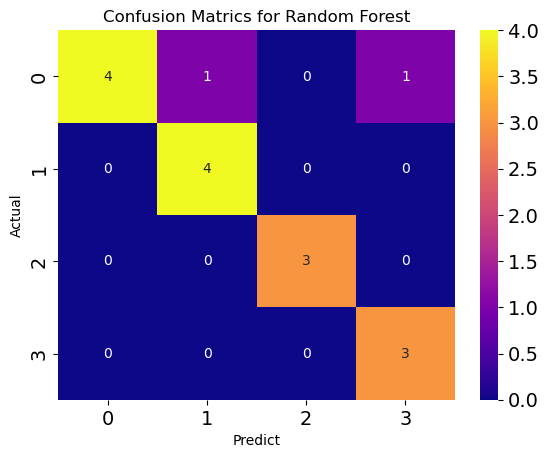

In [ ]:
Ytruerf=best_model_rf.predict(XTest)
print("Classification report for Random forest")
print(classification_report(Ytruerf,YTest))
print("============= ======= =======================")
cmrf=confusion_matrix(Ytruerf,YTest)
print(cmrf)
sns.heatmap(cmrf,annot=True,cmap='plasma')
plt.title("Confusion Matrics for Random Forest")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytruerf,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
rf_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", rf_f1_score)

Total F1-score: 0.88


# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
best_model_ada=AdaBoostClassifier(learning_rate=0.001, n_estimators=300)

Classification report for AdaBoost
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         3
           3       1.00      0.57      0.73         7

    accuracy                           0.81        16
   macro avg       0.84      0.89      0.83        16
weighted avg       0.88      0.81      0.81        16

============= ======= =======================
[[3 0 0 0]
 [0 3 0 0]
 [0 0 3 0]
 [1 2 0 4]]


Text(45.722222222222214, 0.5, 'Actual')

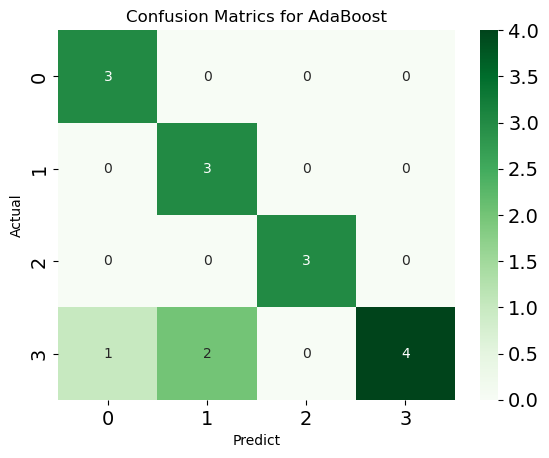

In [ ]:
best_model_ada.fit(XTrain,YTrain)
Ytrueada=best_model_ada.predict(XTest)
print("Classification report for AdaBoost")
print(classification_report(Ytrueada,YTest))
print("============= ======= =======================")
cmada=confusion_matrix(Ytrueada,YTest)
print(cmada)
sns.heatmap(cmada,annot=True,cmap='Greens')
plt.title("Confusion Matrics for AdaBoost")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytrueada,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
ada_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", ada_f1_score)

Total F1-score: 0.81


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
best_model_svm=SVC(C= 1, gamma= 0.1, kernel='linear')

Classification report for SVM
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.89      0.92      0.89        16
weighted avg       0.90      0.88      0.87        16

============= ======= =======================
[[4 1 0 1]
 [0 4 0 0]
 [0 0 3 0]
 [0 0 0 3]]


Text(45.722222222222214, 0.5, 'Actual')

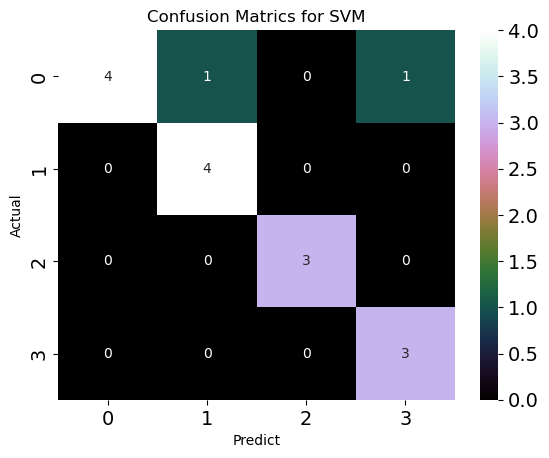

In [ ]:
#best_model_svm=gcvsvm.best_estimator_
best_model_svm.fit(XTrain,YTrain)
Ytruesvm=best_model_svm.predict(XTest)
print("Classification report for SVM")
print(classification_report(Ytruesvm,YTest))
print("============= ======= =======================")
cmsvm=confusion_matrix(Ytruesvm,YTest)
print(cmsvm)
sns.heatmap(cmsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for SVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytruesvm,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
svm_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", svm_f1_score)

Total F1-score: 0.88


# Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
best_lsvm_model=LinearSVC(C=1)

Classification report for LinearSVM
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.89      0.92      0.89        16
weighted avg       0.90      0.88      0.87        16

============= ======= =======================
[[4 1 0 1]
 [0 4 0 0]
 [0 0 3 0]
 [0 0 0 3]]


Text(45.722222222222214, 0.5, 'Actual')

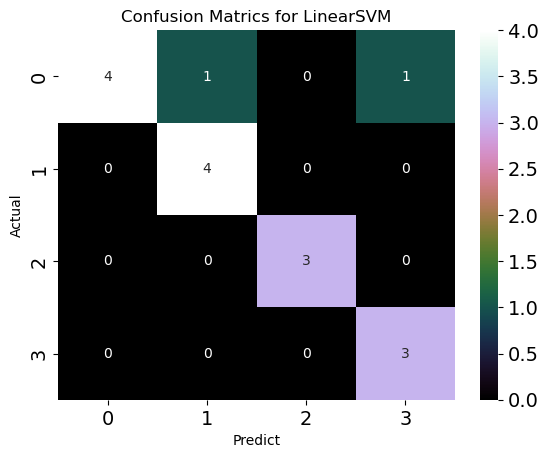

In [ ]:
best_lsvm_model.fit(XTrain,YTrain)
Ytruelsvm=best_lsvm_model.predict(XTest)
print("Classification report for LinearSVM")
print(classification_report(Ytruelsvm,YTest))
print("============= ======= =======================")
cmlsvm=confusion_matrix(Ytruelsvm,YTest)
print(cmlsvm)
sns.heatmap(cmlsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for LinearSVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
lines = classification_report(Ytruelsvm,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
lsvm_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", lsvm_f1_score)

Total F1-score: 0.88


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pickle

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
file_path = '/content/Cleaned_Resumes.csv'
data = pd.read_csv(file_path)

In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

data['Cleaned_Resume'] = data['Resume_Details'].apply(clean_text)

In [4]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_Resume'], data['Category'], test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorization and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

In [6]:
accuracy = pipeline.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9375


In [7]:
with open('resume_classifier.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

In [8]:
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)

In [9]:
from flask import Flask, request, jsonify
import pickle
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [10]:
with open('resume_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('label_encoder.pkl', 'rb') as le_file:
    label_encoder = pickle.load(le_file)

app = Flask(__name__)

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [12]:
def predict():
    data = request.json
    resume_details = data['resume_details']
    cleaned_resume = clean_text(resume_details)
    prediction = model.predict([cleaned_resume])
    predicted_category = label_encoder.inverse_transform(prediction)[0]
    return jsonify({'predicted_category': predicted_category})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [13]:
!python app.py

python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [14]:
!curl -X POST -H "Content-Type: application/json" -d '{"resume_details": "your resume text here"}' http://0.0.0.0:5000/predict-----------------

curl: (7) Failed to connect to 0.0.0.0 port 5000 after 0 ms: Connection refused
